### Sales Forecast

**Motivation! What's the context?**
- In 2017 Olist started to forecast its monthly sales based on the average revenue from 3 months before. But now the company wants to be able to predict future sales more accurately with a wider time range (3 months).

**Why?**
- To efficiently allocate resources for future projects, growth and manage its cash flow. 

**Who are the stakeholders?**
- The financial sector will use the forecast to the set operating budgets and to project cash flows.
- And the marketing team, who will have the opportunity to schedule promotions if it appears sales <br>
will be weak and will be able to better allocate budget among other marketing activities.

**What is the deliverable?**
- A dashboard with the information about the forecast.


> **ps: We will use the data to forecast the second quarter of 2018 and the third quarter will be our "production data".**

## Agenda

[Cycles Notes](#Cycles-Notes)<br>

[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>
&nbsp;[](#)<br>

&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>
&nbsp;&nbsp;[](#)<br>


# Cycles Notes

**1st - .**

**2nd - .**

**3rd - .**

In [1]:
from notebook_utils.utils import *
from notebook_utils.ml_utils import *

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [3]:
directory = Directory("1.3-pr-sales-prediction-arima")

## 0.0 Loading Data

Since We are not preprocessing any data we can use the project proposal serie itself.

In [4]:
df = pd.read_pickle(os.path.join(os.path.join(directory.DATA_DIR, 'sales_forecast_data'), 'olist_2017_forecasts_table_model.pkl'))
df.round(2)

known_revenue  estimated_revenue
year month                                  
2017 1          127482.37           15551.25
     2          271239.32           57997.55
     3          414330.95          132913.77
     4          390812.40          271017.55
     5          566851.40          358794.22
     6          490050.37          457331.58
     7          566299.08          482571.39
     8          645832.36          541066.95
     9          701077.49          567393.94
     10         751117.01          637736.31
     11        1153364.20          699342.29
     12         843078.29          868519.57
2018 1         1077887.46          915853.17
     2          966168.41         1024776.65
     3         1120598.24          962378.05
     4         1132878.93         1054884.70
     5         1128774.52         1047217.12
     6         1011978.29         1074233.35
     7         1027807.28         1058778.39
     8          985491.64         1060076.29

### 0.1 Train and Test Data Frame

In [94]:
y_train = df[:-5]['known_revenue']
y_test = df[-5:]['known_revenue']

## 1.0 ARIMA

We beated the baseline

In [379]:
model = ARIMA(y_train.values, order=(2,0,0)).fit()
predictions = model.forecast(5)
september = model.forecast(6)[-1]
# evaluation(y_test, predictions)

evaluation(y_test[:3], predictions[:3], "\n2nd Quarter of 2018")


2nd Quarter of 2018
On average, our predictions are 5.7% above or below the real value.
Which means an error of about R$ 64127.08


(64127.08, 5.7032082465927845)

In [226]:
# print(model.summary())

## 2.0 Evaluation

In [156]:
evaluation(y_test[3:], predictions[3:], "3rd Quarter of 2018")

3rd Quarter of 2018
On average, our predictions are 1.32% above or below the real value.
Which means an error of about R$ 13165.92


(13165.92, 1.3199931793536126)

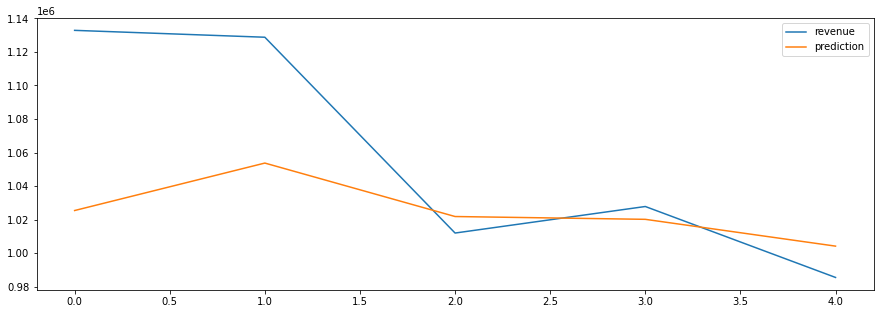

In [144]:
arima_evaluation = pd.concat([pd.Series(y_test.ravel(), name='revenue'), pd.Series(predictions.ravel(), name='prediction')], axis=1)
arima_evaluation.plot(figsize=(15,5));

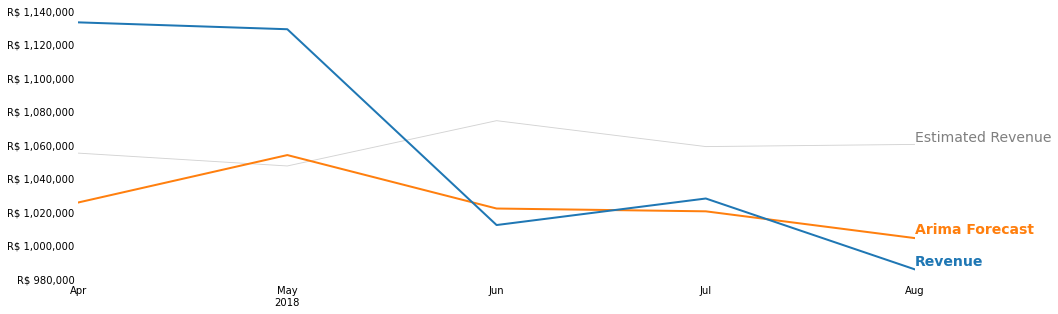

In [201]:
olist_forecast = df.copy()
olist_forecast['arima_forecast'] = np.concatenate( ( np.zeros(olist_forecast['known_revenue'][:-5].shape), predictions ) )

aux = olist_forecast[-5:].copy()
aux.index = pd.to_datetime(['2018-04-30', '2018-05-31', '2018-06-30',
                            '2018-07-31', '2018-08-31'])
plt.box(False)
aux['estimated_revenue'].plot(figsize=(15,5), color=['lightgrey'], linewidth=.9);
aux['arima_forecast'].plot(figsize=(15,5), color=['#ff7f0e'], linewidth=2);
ax = aux['known_revenue'].plot(figsize=(15,5), color=['#1f77b4'], linewidth=2);
plt.tick_params(axis='both', which='both', length=0)
plt.text("2018-08-31", 1062000, "Estimated Revenue", color='#7f7f7f', size=14)
plt.text("2018-08-31", 1007000, "Arima Forecast", color='#ff7f0e', size=14, weight='bold')
plt.text("2018-08-31", 988000, "Revenue", color='#1f77b4', size=14, weight='bold')
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

In [424]:
olist_sales = olist_forecast.copy()
olist_sales.replace(0, np.nan, inplace=True)
dates_index = ['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31']
olist_sales.index = pd.to_datetime(dates_index)

# september_data = [np.nan, np.nan, september]
# september_data = pd.DataFrame(september_data, columns=[pd.to_datetime('2018-09-30')]).T
# september_data.columns = olist_sales.columns
# olist_sales = olist_sales.append(september_data)

error = 5.7/100
olist_sales['error_estimated'] = olist_sales['arima_forecast'] * error
olist_sales.loc['2018-04-30':'2018-06-30', ['error_estimated']] = np.nan
olist_sales['max_confidence_interval'] = olist_sales['arima_forecast'] + olist_sales['error_estimated']
olist_sales['min_confidence_interval'] = olist_sales['arima_forecast'] - olist_sales['error_estimated']
olist_sales.round(2)

,known_revenue,estimated_revenue,arima_forecast,error_estimated,max_confidence_interval,min_confidence_interval
2017-01-31,127482.37,15551.25,NaN,NaN,NaN,NaN
2017-02-28,271239.32,57997.55,NaN,NaN,NaN,NaN
2017-03-31,414330.95,132913.77,NaN,NaN,NaN,NaN
2017-04-30,390812.40,271017.55,NaN,NaN,NaN,NaN
2017-05-31,566851.40,358794.22,NaN,NaN,NaN,NaN
2017-06-30,490050.37,457331.58,NaN,NaN,NaN,NaN
2017-07-31,566299.08,482571.39,NaN,NaN,NaN,NaN
2017-08-31,645832.36,541066.95,NaN,NaN,NaN,NaN
2017-09-30,701077.49,567393.94,NaN,NaN,NaN,NaN
2017-10-31,751117.01,637736.31,NaN,NaN,NaN,NaN


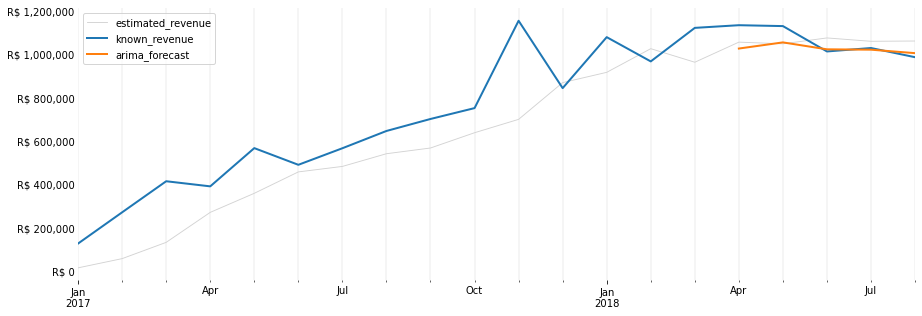

In [476]:
plt.box(False)
olist_sales['estimated_revenue'].plot(figsize=(15,5), color=['lightgrey'], linewidth=.9);
ax = olist_sales['known_revenue'].plot(color=['#1f77b4'], linewidth=2);
olist_sales['arima_forecast'].plot(color=['#ff7f0e'], linewidth=2);
# olist_sales['max_confidence_interval'].plot(color=['orange'], linewidth=1);
# olist_sales['min_confidence_interval'].plot(color=['orange'], linewidth=1);
plt.tick_params(axis='y', length=0)
# plt.text("2018-08-31", 1062000, "Estimated Revenue", color='#7f7f7f', size=14)
# plt.text("2018-08-31", 1007000, "Arima Forecast", color='#ff7f0e', size=14, weight='bold')
# plt.text("2018-08-31", 988000, "Revenue", color='#1f77b4', size=14, weight='bold')
plt.legend()
plt.grid(axis='x', which='both', linewidth=.25)
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

In [478]:
known_revenue = olist_sales['known_revenue']
arima_forecast = known_revenue.copy()
arima_forecast.loc['2018-04-30':'2018-08-31'] = olist_sales.loc['2018-04-30':'2018-08-31', 'arima_forecast']
estimated_revenue = aa.copy()
estimated_revenue.loc['2018-04-30':'2018-08-31'] = olist_sales.loc['2018-04-30':'2018-08-31', 'estimated_revenue']

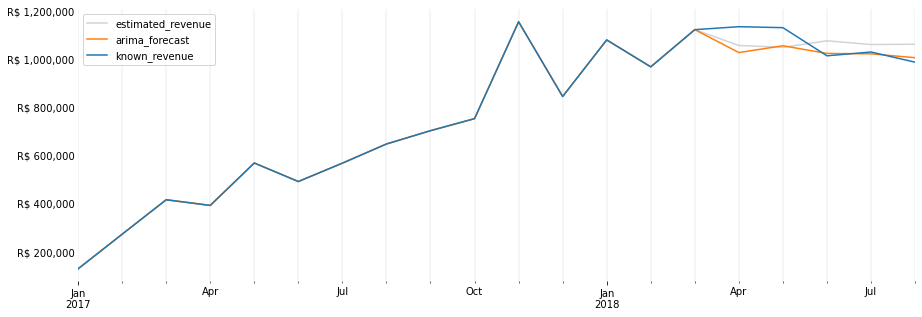

In [483]:
plt.box(False)
estimated_revenue.plot(color='lightgrey', label='estimated_revenue')
arima_forecast.plot(color='#ff7f0e', label='arima_forecast')
ax = known_revenue.plot(figsize=(15,5), color = '#1f77b4', label='known_revenue')
plt.tick_params(axis='y', length=0)
plt.legend()
plt.grid(axis='x', which='both', linewidth=.25)
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

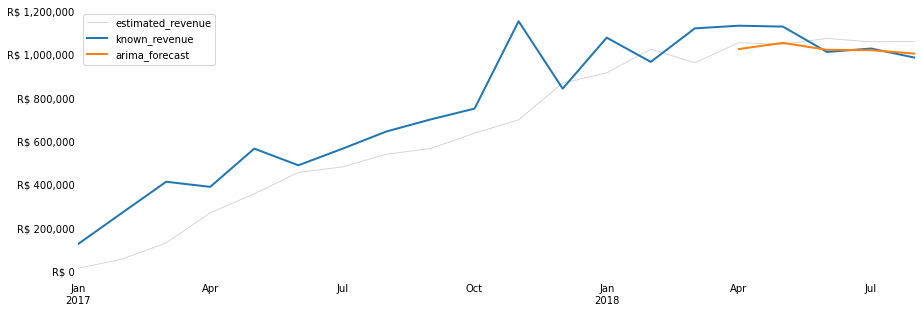

In [484]:
plt.box(False)
olist_sales['estimated_revenue'].plot(figsize=(15,5), color=['lightgrey'], linewidth=.9);
ax = olist_sales['known_revenue'].plot(color=['#1f77b4'], linewidth=2);
olist_sales['arima_forecast'].plot(color=['#ff7f0e'], linewidth=2);
# olist_sales['max_confidence_interval'].plot(color=['orange'], linewidth=1);
# olist_sales['min_confidence_interval'].plot(color=['orange'], linewidth=1);
plt.tick_params(axis='both', which='both', length=0)

plt.legend()
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

pesquisar: análise de resíduo

In [262]:
from statsmodels.tsa.stattools import adfuller

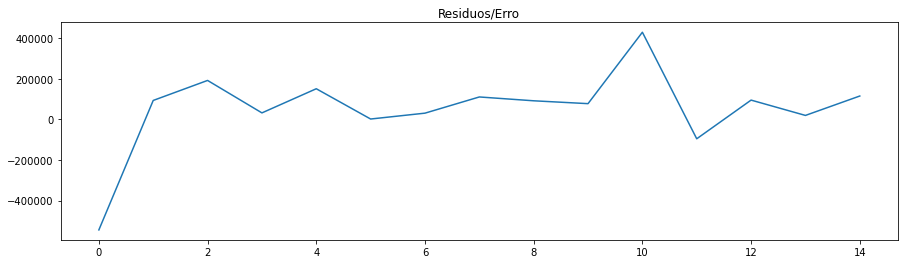

ADF Statistic: -1.698020
p-value: 0.432133
Stacionary: False
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


In [272]:
pd.Series(model.resid).plot(figsize=(15,4), title  = 'Residuos/Erro')
plt.show()
result = adfuller(model.resid)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Stacionary:', (result[1] <= 0.05))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [122]:
df[-5:-2]

known_revenue  estimated_revenue
year month                                  
2018 4         1132878.93       1.054885e+06
     5         1128774.52       1.047217e+06
     6         1011978.29       1.074233e+06

In [121]:
evaluation(df[-5:-2]['known_revenue'],  df[-5:-2]['estimated_revenue'], "\n3rd Quarter of 2018")


3rd Quarter of 2018
On average, our predictions are 6.75% above or below the real value.
Which means an error of about R$ 73935.56


(73935.56, 6.753909004804647)

In [123]:
df[-2:]

known_revenue  estimated_revenue
year month                                  
2018 7         1027807.28       1.058778e+06
     8          985491.64       1.060076e+06

In [124]:
evaluation(df[-2:]['known_revenue'],  df[-2:]['estimated_revenue'], "\n3rd Quarter of 2018")


3rd Quarter of 2018
On average, our predictions are 5.29% above or below the real value.
Which means an error of about R$ 52777.88


(52777.88, 5.290793440861336)

In [363]:
diff = abs(olist_forecast['known_revenue'][-5:] - olist_forecast['estimated_revenue'][-5:])
olist_forecast['abs_moving_average_error'] = np.concatenate( ( np.zeros(olist_forecast['known_revenue'][:-5].shape), diff ) )
diff = abs(olist_forecast['known_revenue'][-5:] - olist_forecast['arima_forecast'][-5:])
olist_forecast['abs_arima_error'] = np.concatenate( ( np.zeros(olist_forecast['known_revenue'][:-5].shape), diff ) )
# olist_forecast.round(2)

In [366]:
olist_forecast['arima_is_better'] = olist_forecast.apply(lambda row: True if
                                                         row['abs_moving_average_error'] > row['abs_arima_error']
                                                         else False, axis=1)
olist_forecast.loc[2018].round(2)

,known_revenue,estimated_revenue,arima_forecast,abs_moving_average_error,abs_arima_error,arima_is_better
month,,,,,,
1,1077887.46,915853.17,0.00,0.00,0.00,False
2,966168.41,1024776.65,0.00,0.00,0.00,False
3,1120598.24,962378.05,0.00,0.00,0.00,False
4,1132878.93,1054884.70,1025409.58,77994.23,107469.35,False
5,1128774.52,1047217.12,1053715.82,81557.40,75058.70,True
6,1011978.29,1074233.35,1021831.49,62255.06,9853.20,True
7,1027807.28,1058778.39,1020156.53,30971.11,7650.75,True
8,985491.64,1060076.29,1004172.73,74584.65,18681.09,True
